In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox



# Read the dataset file
df = pd.read_excel('/content/Real_estate_valuation_data_set.xlsx')

# Perform analysis on the dataset
# ...

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.info()
df_orig=df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
print(df.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [5]:
print(df.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148953     17.712560   
std    119.655756             0.281995     11.392485   
min      1.000000          2012.666667      0.000000   
25%    104.250000          2012.916667      9.025000   
50%    207.500000          2013.166667     16.100000   
75%    310.750000          2013.416667     28.150000   
max    414.000000          2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

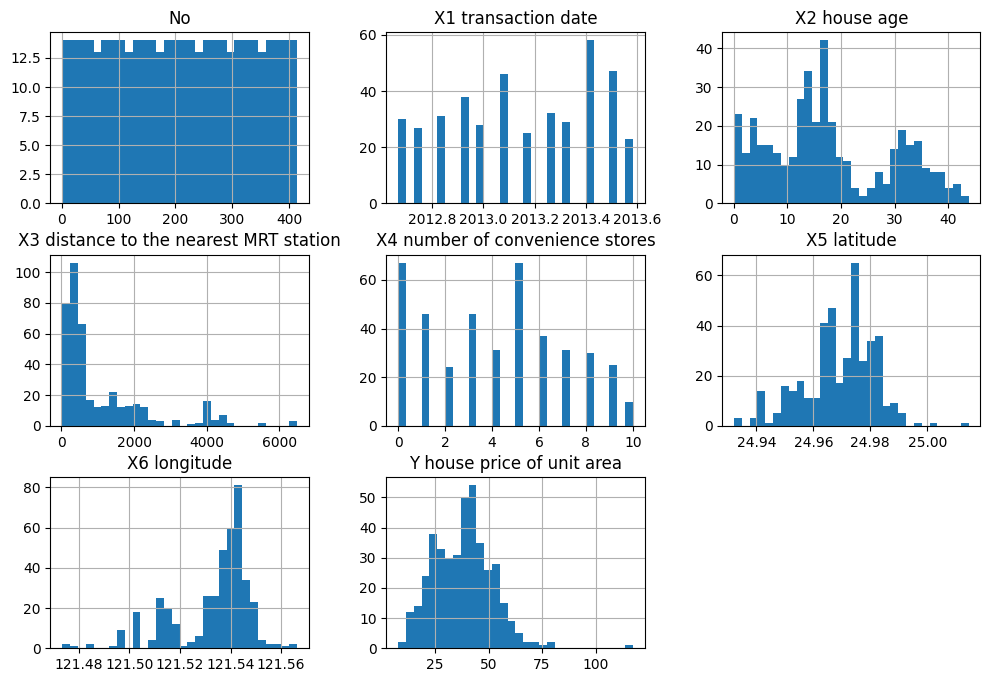

In [6]:
df.hist(bins=30, figsize=(12,8))
plt.show()

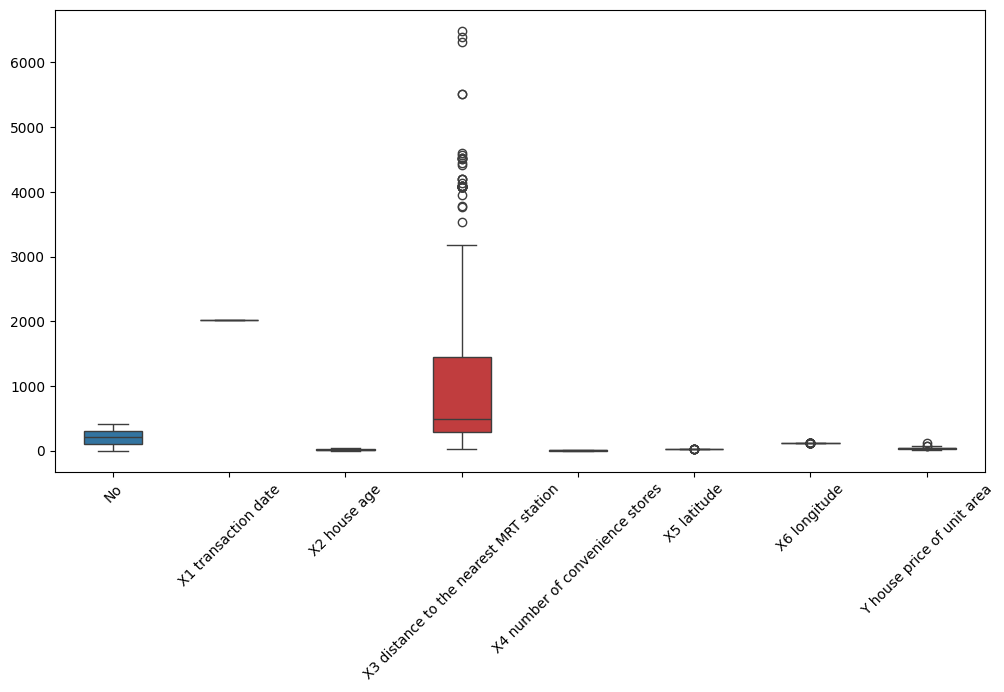

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, width=0.5)
plt.xticks(rotation=45)
plt.show()

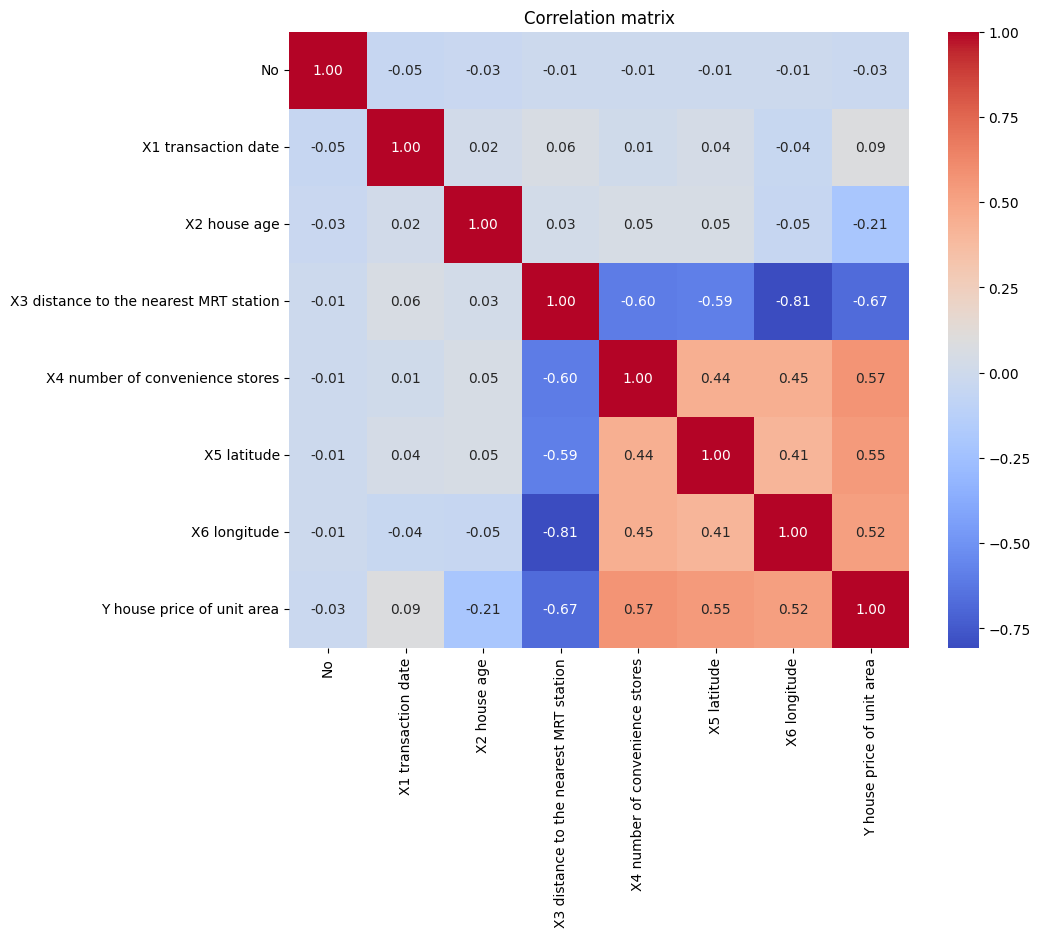

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix")
plt.show()

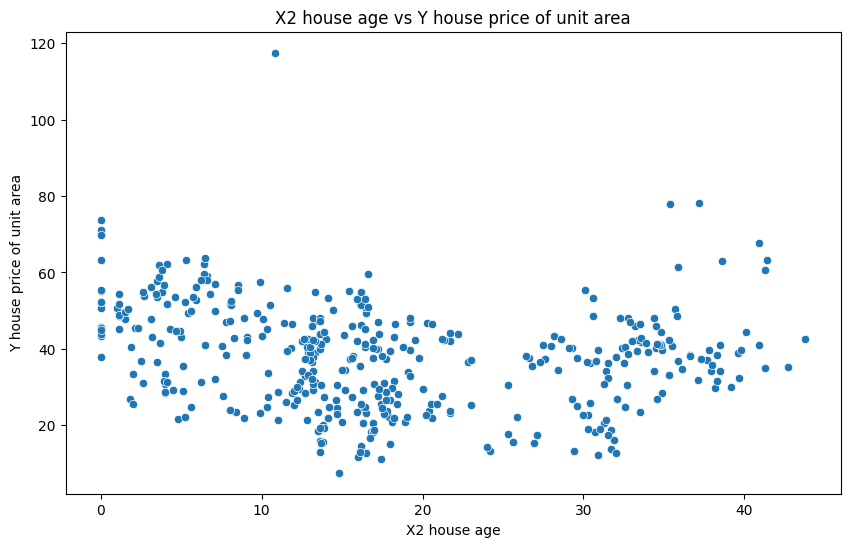

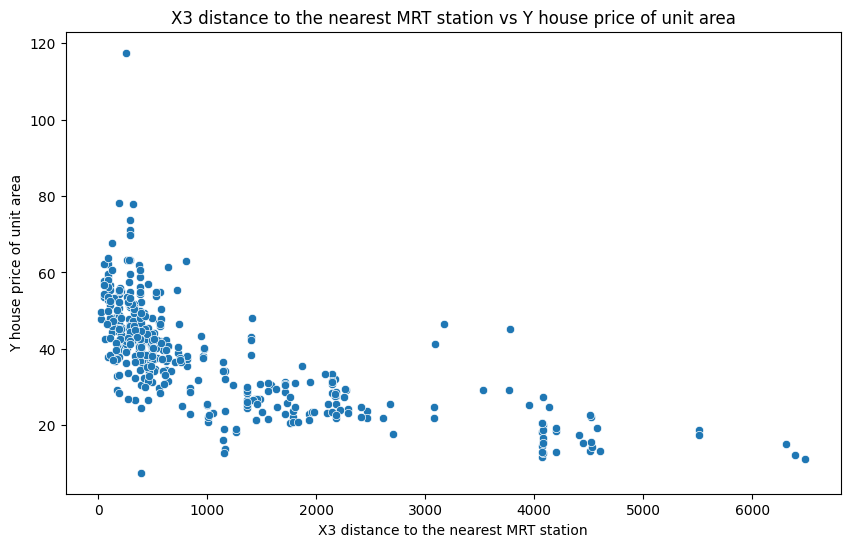

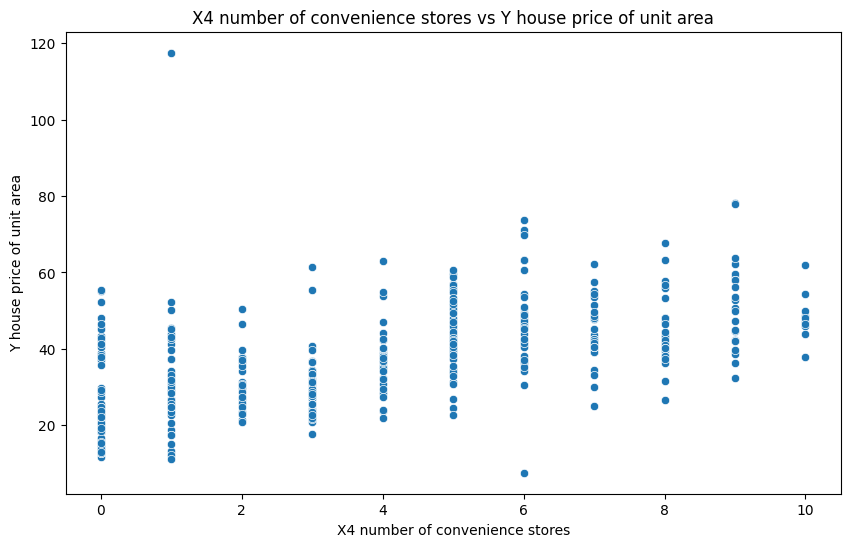

In [9]:
target_column = 'Y house price of unit area'

features = ["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores"]
for feature in features:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=feature, y=target_column)
    plt.title(f"{feature} vs {target_column}")
    plt.show()

In [10]:
df.to_csv('real_estate.csv', index=False)


In [11]:
df = df.drop(columns=['No', 'X1 transaction date'])

In [12]:
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

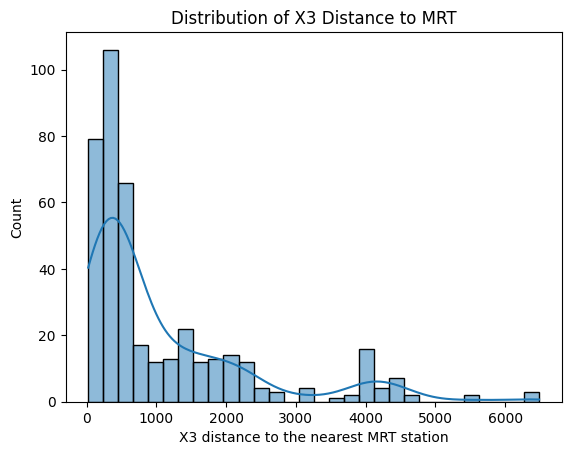

In [16]:
# Histplot of X3 distance to the nearest MRT station
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["X3 distance to the nearest MRT station"], kde=True, bins=30)
plt.title("Distribution of X3 Distance to MRT")
plt.show()


In [17]:


df["X3_log"] = np.log1p(df["X3 distance to the nearest MRT station"])  # log(1+x) to handle zero values


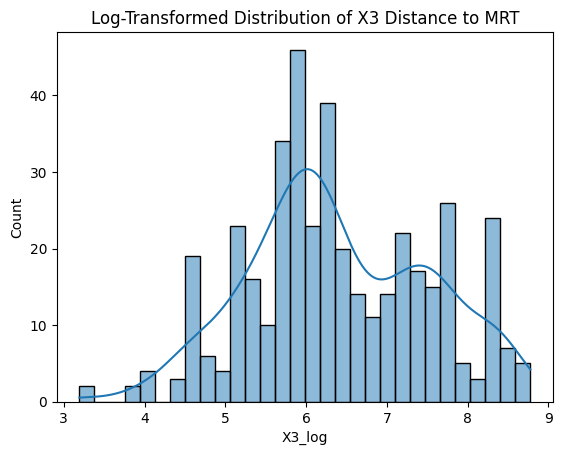

In [18]:


sns.histplot(df["X3_log"], kde=True, bins=30)
plt.title("Log-Transformed Distribution of X3 Distance to MRT")
plt.show()


In [19]:
df[['X3_log', 'Y house price of unit area']].corr()


,X3_log,Y house price of unit area
X3_log,1.000000,-0.734674
Y house price of unit area,-0.734674,1.000000


In [20]:
# High negative correlation between X3_log and Y house price of unit area indicates the price increases as the distance to the nearest MRT station decreases

Text(0, 0.5, 'House Price per Unit Area (Y)')

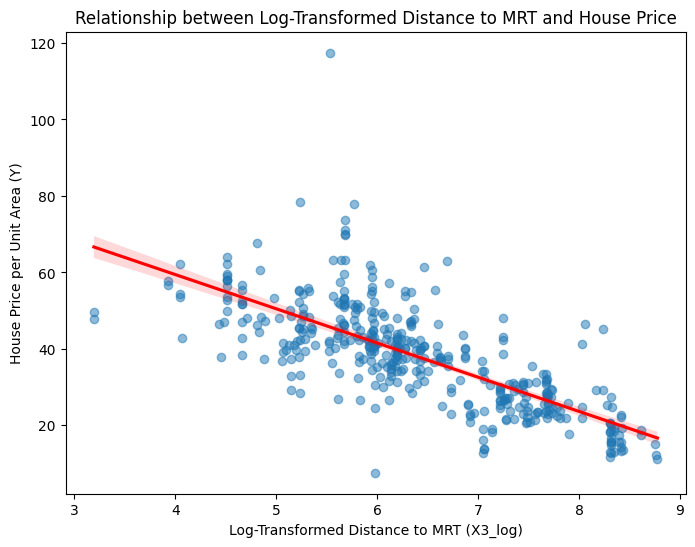

In [21]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["X3_log"], y=df["Y house price of unit area"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Titles and labels
plt.title("Relationship between Log-Transformed Distance to MRT and House Price")
plt.xlabel("Log-Transformed Distance to MRT (X3_log)")
plt.ylabel("House Price per Unit Area (Y)")


Text(0, 0.5, 'House Price per Unit Area (Y)')

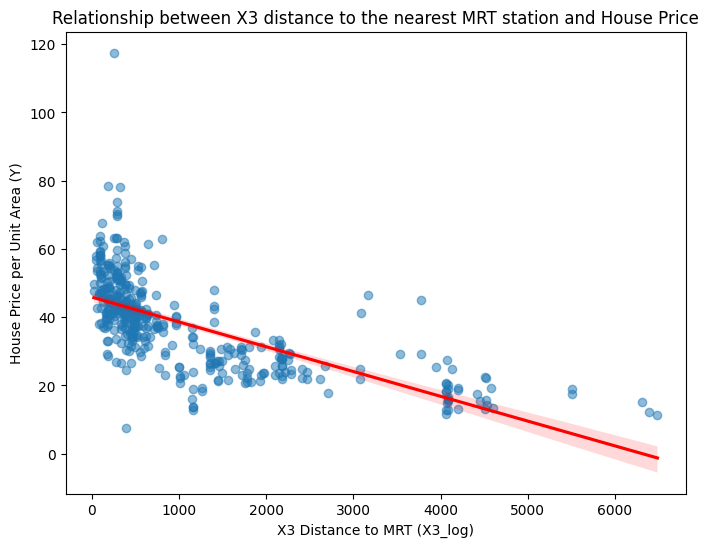

In [22]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["X3 distance to the nearest MRT station"], y=df["Y house price of unit area"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Titles and labels
plt.title("Relationship between X3 distance to the nearest MRT station and House Price")
plt.xlabel("X3 Distance to MRT (X3_log)")
plt.ylabel("House Price per Unit Area (Y)")


Text(0, 0.5, 'House Price per Unit Area (Y)')

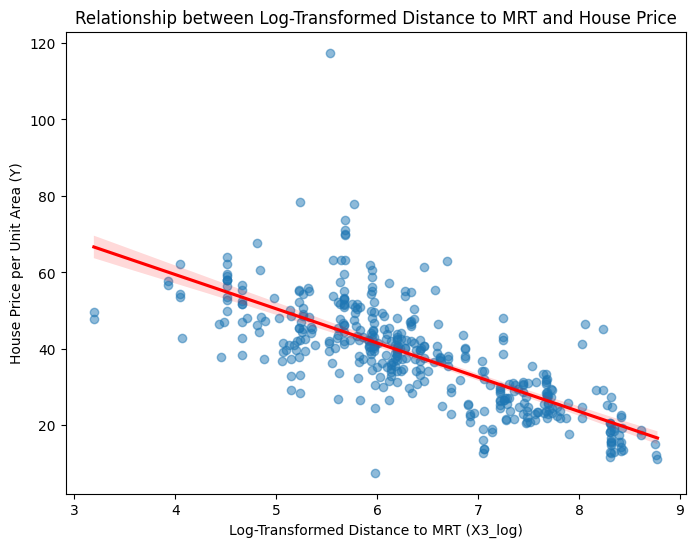

In [23]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["X3_log"], y=df["Y house price of unit area"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Titles and labels
plt.title("Relationship between Log-Transformed Distance to MRT and House Price")
plt.xlabel("Log-Transformed Distance to MRT (X3_log)")
plt.ylabel("House Price per Unit Area (Y)")


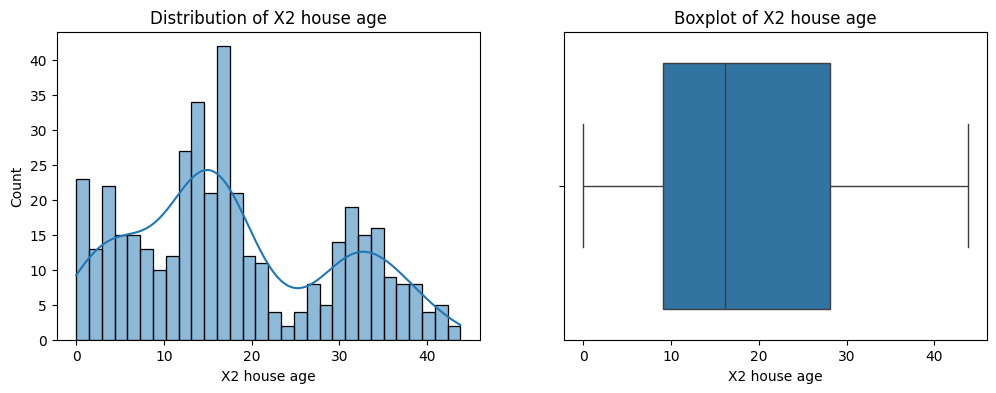

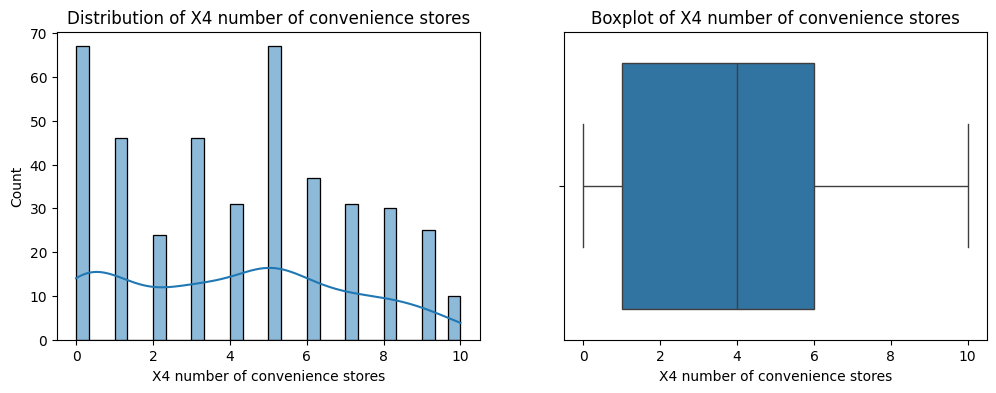

In [24]:


# List of features to analyze
features = ['X2 house age', 'X4 number of convenience stores']

# Plot histograms and boxplots
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram with KDE
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Distribution of {feature}")

    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[1])
    axes[1].set_title(f"Boxplot of {feature}")

    plt.show()


In [25]:
df[['X4 number of convenience stores', 'Y house price of unit area']].corr()


,X4 number of convenience stores,Y house price of unit area
X4 number of convenience stores,1.000000,0.571005
Y house price of unit area,0.571005,1.000000


Text(0, 0.5, 'House Price per Unit Area (Y)')

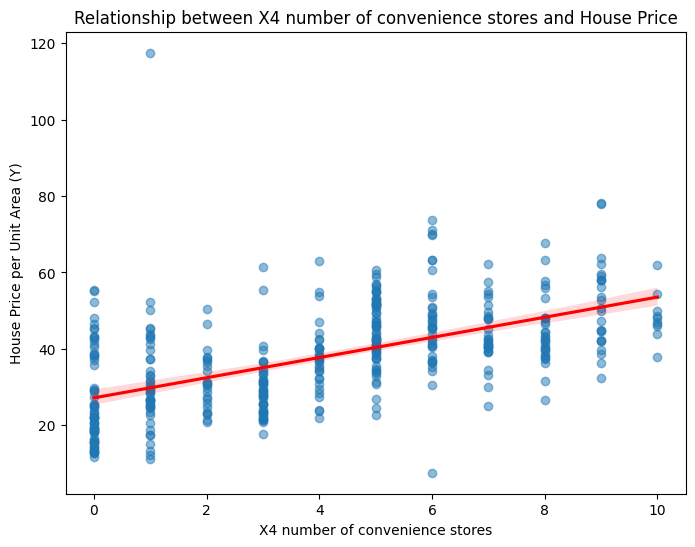

In [26]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["X4 number of convenience stores"], y=df["Y house price of unit area"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Titles and labels
plt.title("Relationship between X4 number of convenience stores and House Price")
plt.xlabel("X4 number of convenience stores")
plt.ylabel("House Price per Unit Area (Y)")


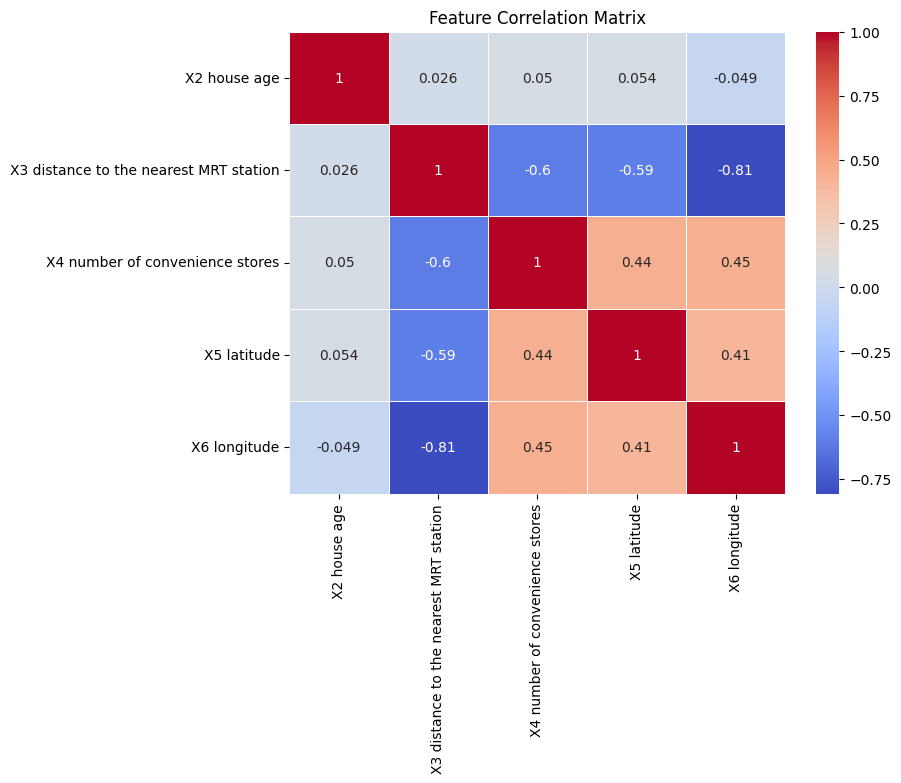

In [27]:
# Multicollineaity check
# Compute correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [28]:


# Create a dataframe for VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                  Feature           VIF
0                            X2 house age  3.470796e+00
1  X3 distance to the nearest MRT station  2.970976e+00
2         X4 number of convenience stores  4.732308e+00
3                             X5 latitude  5.913399e+06
4                            X6 longitude  5.913114e+06


In [29]:
X_location = df[['X5 latitude', 'X6 longitude']]

In [30]:
pca = PCA(n_components=1)  # Reduce to 1 component
df['PCA_Location'] = pca.fit_transform(X_location)

In [31]:
df = df.drop(['X5 latitude', 'X6 longitude'], axis=1)


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_new = df.drop(columns=['Y house price of unit area'])  # Exclude target variable

vif_data = pd.DataFrame()
vif_data["Feature"] = X_new.columns
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

print(vif_data)


                                  Feature        VIF
0                            X2 house age   3.512594
1  X3 distance to the nearest MRT station  10.297908
2         X4 number of convenience stores   3.782474
3                                  X3_log  12.764523
4                            PCA_Location   3.885381


In [41]:
df['X1_year'] = df_orig['X1 transaction date'].astype(int)  # Extract the integer year
df['X1_fraction'] = df_orig['X1 transaction date'] - df['X1_year']  # Extract decimal part

# Convert fraction to months and assign quarters
df['X1_month'] = (df['X1_fraction'] * 12).round().astype(int)  # Convert fraction to month
df['X1_quarter'] = ((df['X1_month'] - 1) // 3 + 1)  # Convert month to quarter

df.drop(columns=['X1_fraction'], inplace=True)  # Drop unnecessary columns


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
 4   X3_log                                  414 non-null    float64
 5   PCA_Location                            414 non-null    float64
 6   X1_year                                 414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [42]:
X_new = df.drop(columns=['Y house price of unit area'])  # Exclude target variable

vif_data = pd.DataFrame()
vif_data["Feature"] = X_new.columns
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

print(vif_data)


                                  Feature         VIF
0                            X2 house age    3.539462
1  X3 distance to the nearest MRT station   14.721133
2         X4 number of convenience stores    5.738237
3                                  X3_log  177.192735
4                            PCA_Location    3.964149
5                                 X1_year  160.379142
6                                X1_month   70.791810
7                              X1_quarter   85.926293


In [43]:
df.drop(columns=['X1_month', 'X1_quarter'], inplace=True)


In [44]:
X_new = df.drop(columns=['Y house price of unit area'])  # Exclude target variable

vif_data = pd.DataFrame()
vif_data["Feature"] = X_new.columns
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

print(vif_data)

                                  Feature         VIF
0                            X2 house age    3.515013
1  X3 distance to the nearest MRT station   14.618174
2         X4 number of convenience stores    5.724224
3                                  X3_log  176.979532
4                            PCA_Location    3.957736
5                                 X1_year  154.743902


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
 4   X3_log                                  414 non-null    float64
 5   PCA_Location                            414 non-null    float64
 6   X1_year                                 414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [47]:

# Select latitude & longitude columns
location_features = df_orig[['X5 latitude', 'X6 longitude']]

# Perform PCA (reduce to 1 component)
pca = PCA(n_components=1)
df['PCA_Location'] = pca.fit_transform(location_features)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
 4   X3_log                                  414 non-null    float64
 5   PCA_Location                            414 non-null    float64
 6   X1_year                                 414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [49]:
df['X1_year'] = df_orig['X1 transaction date'].astype(str).str[:4].astype(int)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
 4   X3_log                                  414 non-null    float64
 5   PCA_Location                            414 non-null    float64
 6   X1_year                                 414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
pip install --upgrade scikit-learn

In [55]:

# Define features and target
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'PCA_Location', 'X1_year']]
#X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'PCA_Location']]
y = df['Y house price of unit area']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print(f"With X1_year -> R²: {r2:.4f}, RMSE: {rmse:.4f}")


With X1_year -> R²: 0.6833, RMSE: 7.2891


In [56]:
# Define features excluding X1_year
X_baseline = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'PCA_Location']]
y = df['Y house price of unit area']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Train model
model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)

# Evaluate
y_pred_baseline = model_baseline.predict(X_test)
r2_baseline = r2_score(y_test, y_pred_baseline)
rmse_baseline = mean_squared_error(y_test, y_pred_baseline)**0.5

print(f"Without X1_year -> R²: {r2_baseline:.4f}, RMSE: {rmse_baseline:.4f}")


Without X1_year -> R²: 0.6586, RMSE: 7.5674


In [57]:
feature_names = X.columns
coefficients = model.coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


X2 house age: -0.2619
X3 distance to the nearest MRT station: -0.0042
X4 number of convenience stores: 1.2600
PCA_Location: 108.7597
X1_year: 2.3696


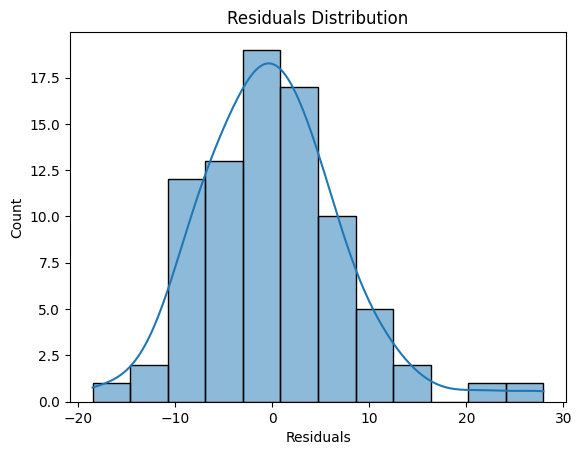

In [58]:

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()


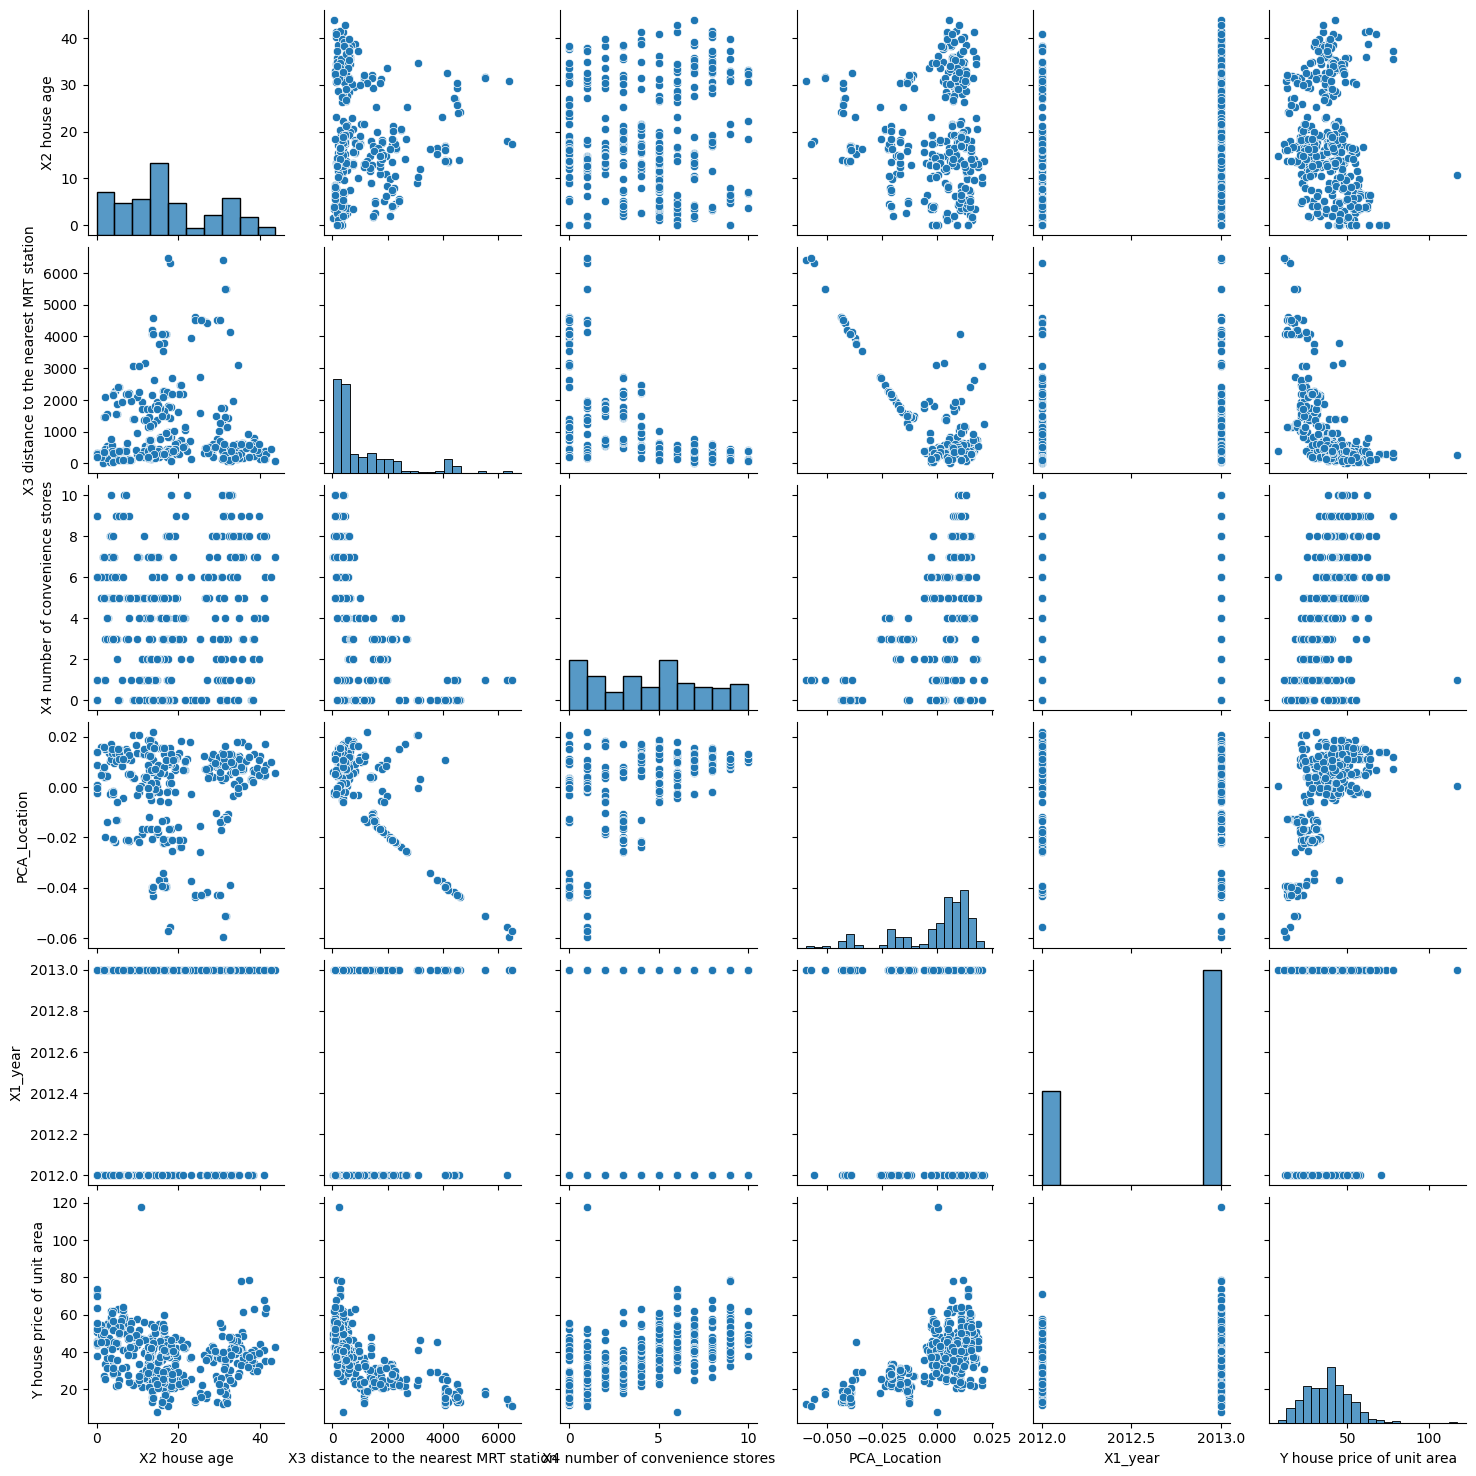

In [59]:

# Select numerical columns for visualization
selected_features = ['X2 house age', 'X3 distance to the nearest MRT station',
                     'X4 number of convenience stores', 'PCA_Location', 'X1_year', 'Y house price of unit area']

# Pairplot to see feature-target relationships
sns.pairplot(df[selected_features])
plt.show()


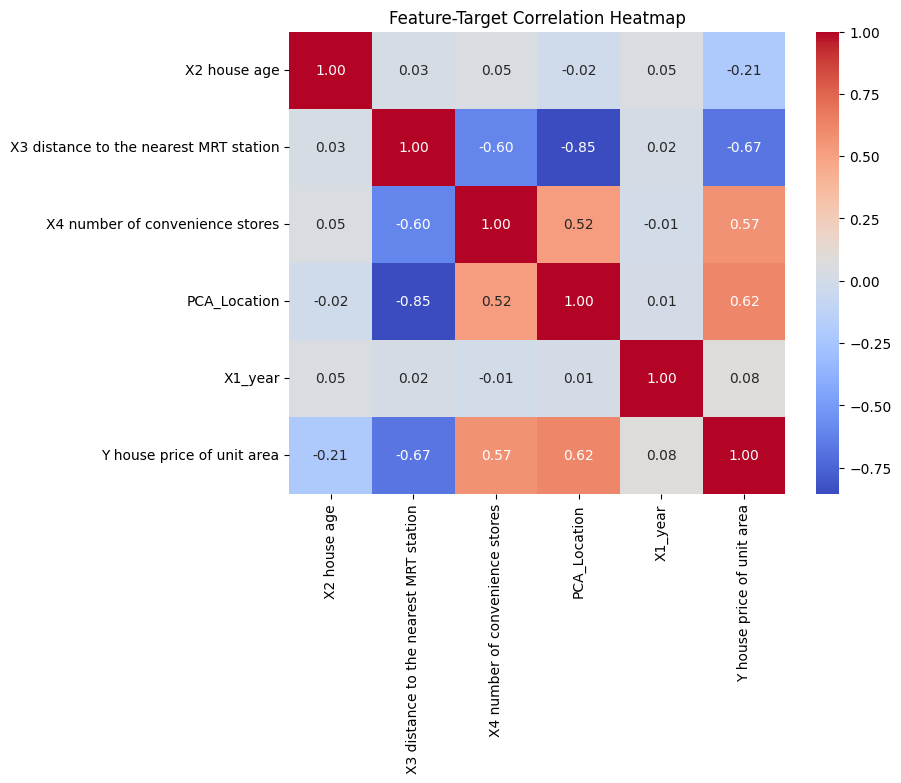

In [60]:


# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature-Target Correlation Heatmap")
plt.show()


In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
 4   X3_log                                  414 non-null    float64
 5   PCA_Location                            414 non-null    float64
 6   X1_year                                 414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [62]:
df["X3_log"] = np.log1p(df["X3 distance to the nearest MRT station"])
df.to_csv("modified_data.csv", index=False)  # Save to verify changes persist


In [63]:
df = pd.read_csv("modified_data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
 4   X3_log                                  414 non-null    float64
 5   PCA_Location                            414 non-null    float64
 6   X1_year                                 414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


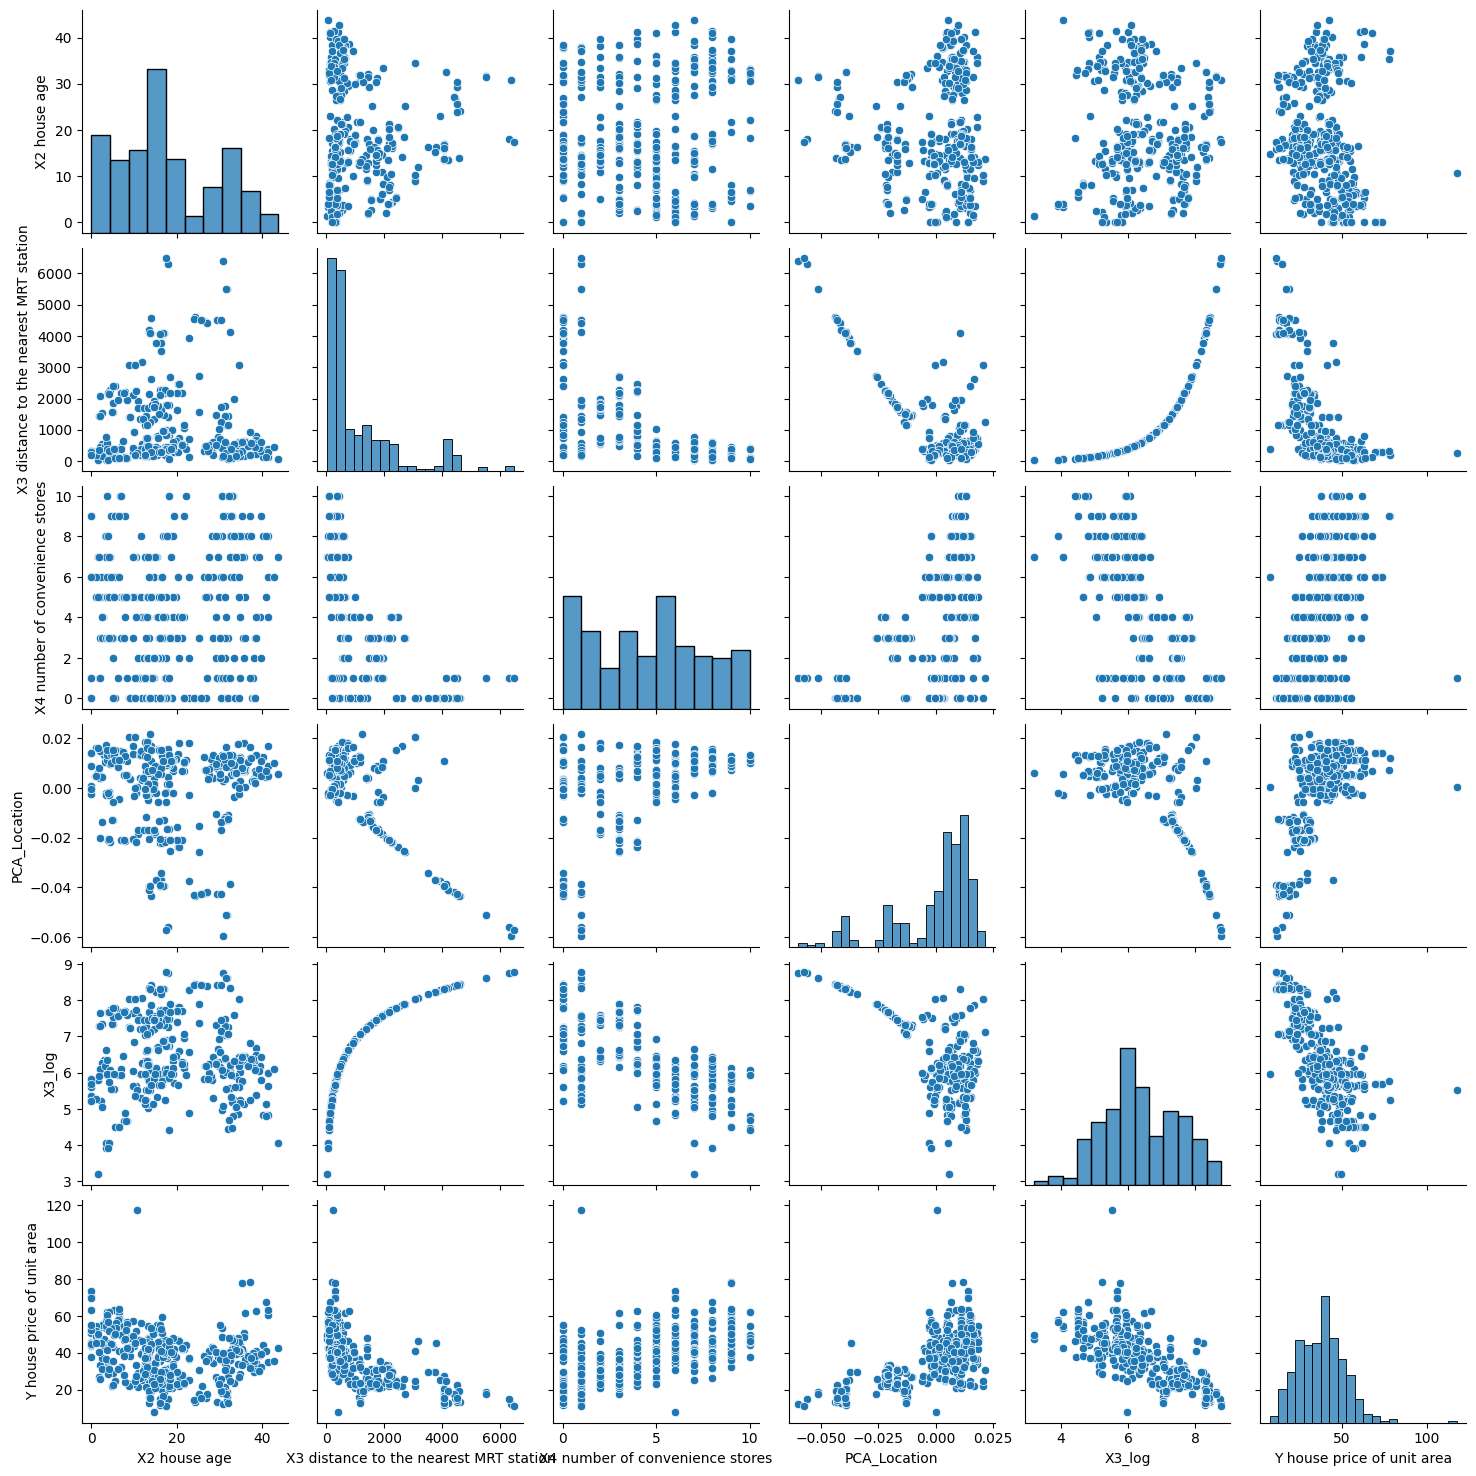

In [64]:
# Select numerical columns for visualization
#selected_features = ['X2 house age', 'X3 distance to the nearest MRT station',
#                    'X4 number of convenience stores', 'PCA_Location', 'X1_year', 'X3_log','Y house price of unit area']
selected_features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'PCA_Location', 'X3_log','Y house price of unit area']
# Pairplot to see feature-target relationships
sns.pairplot(df[selected_features])
plt.show()


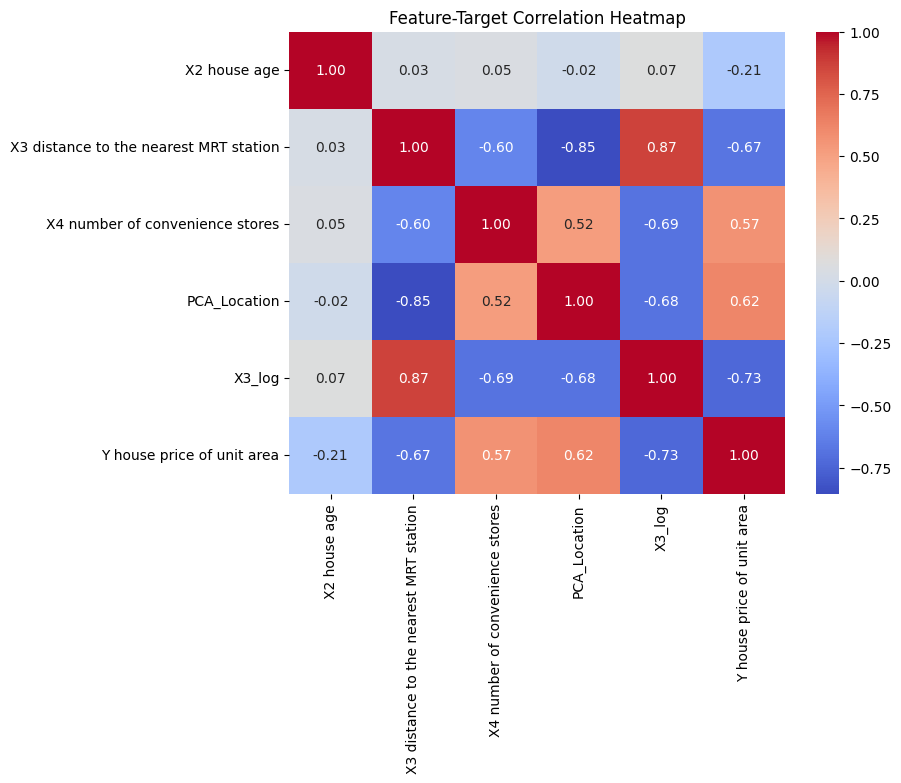

In [65]:
# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature-Target Correlation Heatmap")
plt.show()


In [66]:


# Selecting relevant numerical predictors
#X = df[["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores",
#        "PCA_Location", "X1_year", "X3_log"]]

X = df[["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores","PCA_Location", "X3_log"]]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                                  Feature        VIF
0                            X2 house age   3.512594
1  X3 distance to the nearest MRT station  10.297908
2         X4 number of convenience stores   3.782474
3                            PCA_Location   3.885381
4                                  X3_log  12.764523


In [67]:

# Drop X3 distance to the MRT station
df_vif = df.drop(columns=["X3 distance to the nearest MRT station"])


# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print(vif_data)


                           Feature         VIF
0                     X2 house age    3.786117
1  X4 number of convenience stores    5.833094
2       Y house price of unit area   22.212785
3                           X3_log  109.570403
4                     PCA_Location    2.002466
5                          X1_year  189.625420


In [73]:
# Drop X3 distance to the MRT station
df_vif = df.drop(columns=["X5 latitude", "X6 longitude","X1_year","X1 transaction date","X3_log"], errors='ignore')

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print(vif_data)
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print(vif_data)


                                  Feature       VIF
0                            X2 house age  2.962415
1  X3 distance to the nearest MRT station  5.016976
2         X4 number of convenience stores  5.065343
3              Y house price of unit area  6.837077
4                            PCA_Location  3.675464
                                  Feature       VIF
0                            X2 house age  2.962415
1  X3 distance to the nearest MRT station  5.016976
2         X4 number of convenience stores  5.065343
3              Y house price of unit area  6.837077
4                            PCA_Location  3.675464


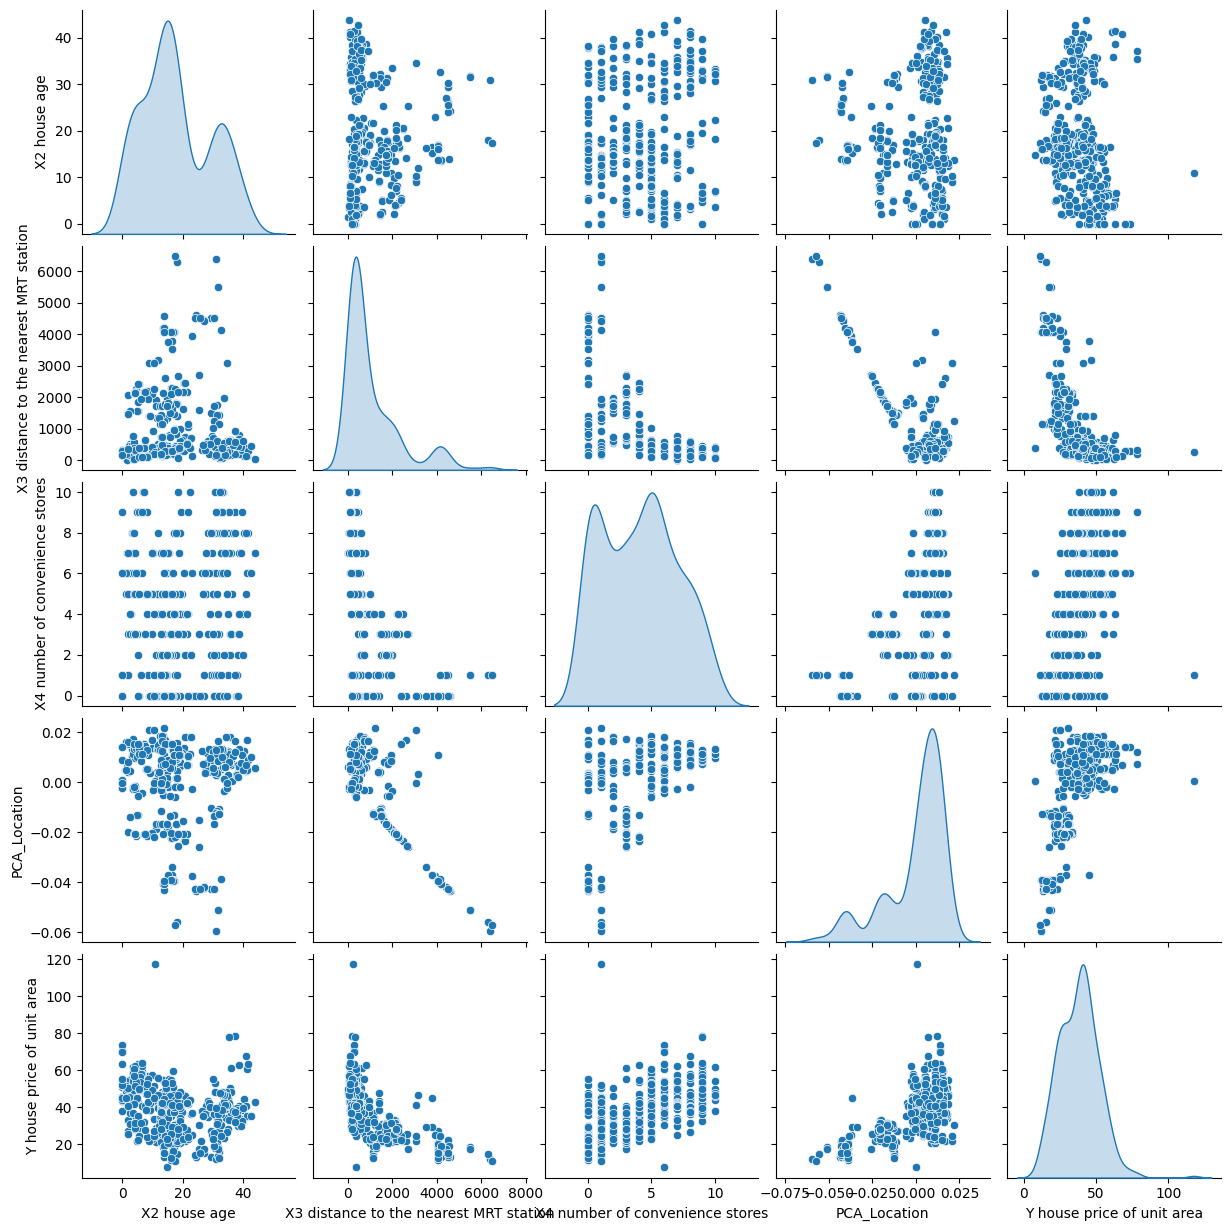

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for pairplot
selected_features = ["X2 house age", "X3 distance to the nearest MRT station",
                     "X4 number of convenience stores", "PCA_Location",
                     "Y house price of unit area"]

# Create pairplot
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()


In [76]:
df['PCA_Location'] = pca.transform(df_orig[['X5 latitude', 'X6 longitude']])


In [85]:

from scipy.stats import boxcox

# Assuming your dataset is named 'df' and 'X3' is the original variable

# Apply different transformations
df['X3_sqrt'] = np.sqrt(df['X3 distance to the nearest MRT station'])   # Square Root Transformation
df['X3_inv'] = 1 / (df['X3 distance to the nearest MRT station'] + 1)   # Inverse Transformation (Avoid division by zero)

# Box-Cox transformation (only if X3 is strictly positive)
df['X3_boxcox'], _ = boxcox(df['X3 distance to the nearest MRT station'] + 1)

# Select features for VIF calculation (update according to your dataset)
features = ['X2 house age', 'X3_sqrt', 'X3_inv', 'X3_boxcox', 'X4 number of convenience stores', 'PCA_Location', 'Y house price of unit area']

# Create a new DataFrame with selected features
df_vif = df[features]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Display the VIF values
print(vif_data)
print("Original Skewness:", df['X3 distance to the nearest MRT station'].skew())
print("Square Root Skewness:", df['X3_sqrt'].skew())
print("Inverse Skewness:", df['X3_inv'].skew())
print("Box-Cox Skewness:", df['X3_boxcox'].skew())


                           Feature        VIF
0                     X2 house age   3.829871
1                          X3_sqrt  48.989554
2                           X3_inv   2.473932
3                        X3_boxcox  91.648994
4  X4 number of convenience stores   5.579907
5                     PCA_Location   3.675537
6       Y house price of unit area  19.313177
Original Skewness: 1.8887565801256048
Square Root Skewness: 1.073804569966851
Inverse Skewness: 4.822184366836388
Box-Cox Skewness: 0.004210668543349012


In [78]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area',
       'X3_log', 'PCA_Location', 'X1_year', 'X3_sqrt', 'X3_inv', 'X3_boxcox'],
      dtype='object')

In [79]:
df_vif = df.drop(columns=["X3_boxcox"])

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print(vif_data)

                                  Feature           VIF
0                            X2 house age      4.045816
1  X3 distance to the nearest MRT station    418.767783
2         X4 number of convenience stores      5.882126
3              Y house price of unit area     23.246449
4                                  X3_log  12049.096071
5                            PCA_Location      4.223832
6                                 X1_year   5036.217713
7                                 X3_sqrt   3867.466291
8                                  X3_inv     18.868820


In [80]:
from scipy.stats import boxcox

# Assuming your dataset is named 'df' and 'X3' is the original variable

# Apply different transformations
df['X3_sqrt'] = np.sqrt(df['X3 distance to the nearest MRT station'])   # Square Root Transformation
df['X3_inv'] = 1 / (df['X3 distance to the nearest MRT station'] + 1)   # Inverse Transformation (Avoid division by zero)

# Box-Cox transformation (only if X3 is strictly positive)
df['X3_boxcox'], _ = boxcox(df['X3 distance to the nearest MRT station'] + 1)

# Select features for VIF calculation (update according to your dataset)
features = ['X2 house age', 'X3_sqrt', 'X3_inv', 'X4 number of convenience stores', 'PCA_Location', 'Y house price of unit area']

# Create a new DataFrame with selected features
df_vif = df[features]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Display the VIF values
print(vif_data)


                           Feature        VIF
0                     X2 house age   3.274851
1                          X3_sqrt   7.243496
2                           X3_inv   2.472939
3  X4 number of convenience stores   5.428680
4                     PCA_Location   2.971715
5       Y house price of unit area  10.676835


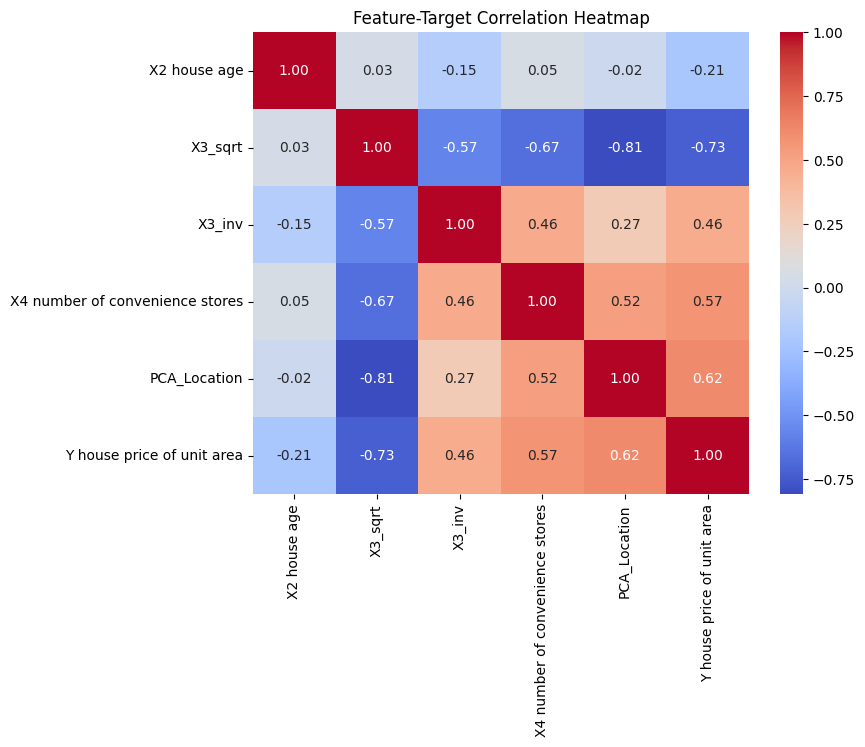

In [81]:
# Compute correlation matrix
corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature-Target Correlation Heatmap")
plt.show()


In [82]:
df_refined = df_vif.drop(columns=['X3_sqrt'])


In [83]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X2 house age                     414 non-null    float64
 1   X3_inv                           414 non-null    float64
 2   X4 number of convenience stores  414 non-null    int64  
 3   PCA_Location                     414 non-null    float64
 4   Y house price of unit area       414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the features for VIF calculation
features = ['X2 house age', 'X3_inv', 'X4 number of convenience stores', 'PCA_Location', 'Y house price of unit area']
df_vif = df_refined[features]

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_data)


                           Feature       VIF
0                     X2 house age  2.709177
1                           X3_inv  2.133314
2  X4 number of convenience stores  5.328231
3                     PCA_Location  1.232005
4       Y house price of unit area  5.620029


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.api import OLS, add_constant

features = ['X2 house age', 'X3_inv', 'X4 number of convenience stores', 'PCA_Location']
target = 'Y house price of unit area'

# Selecting data
df_vif = df_refined[features + [target]].dropna()  # Ensure no missing values

# Splitting data
X = df_vif[features]
y = df_vif[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Statistical Summary using Statsmodels
X_train_const = add_constant(X_train)  # Adds intercept for OLS model
ols_model = OLS(y_train, X_train_const).fit()
print(ols_model.summary())  # Shows p-values, coefficients, etc.

R² Score: 0.6079
RMSE: 8.1103
                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.523
Model:                                    OLS   Adj. R-squared:                  0.517
Method:                         Least Squares   F-statistic:                     89.26
Date:                        Sun, 23 Feb 2025   Prob (F-statistic):           3.76e-51
Time:                                05:50:04   Log-Likelihood:                -1214.0
No. Observations:                         331   AIC:                             2438.
Df Residuals:                             326   BIC:                             2457.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]


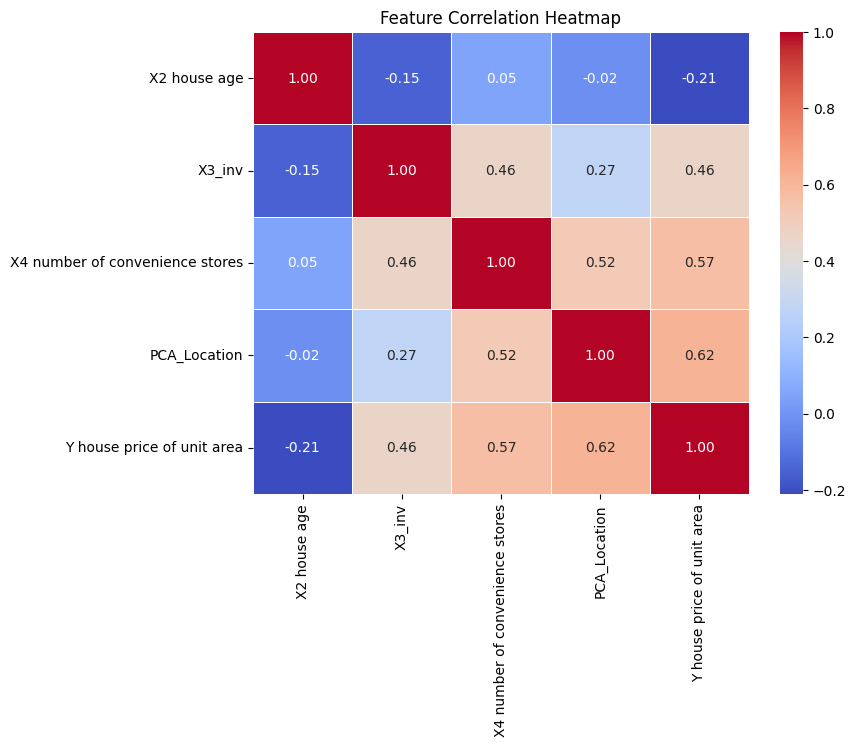

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df_vif.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

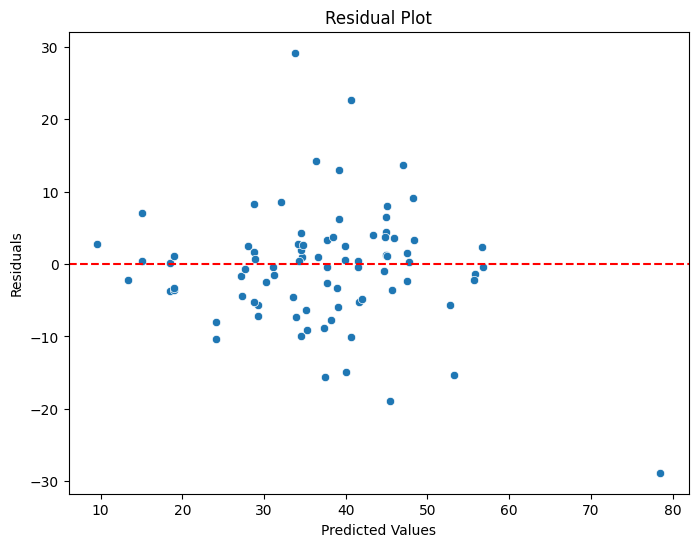

In [92]:
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

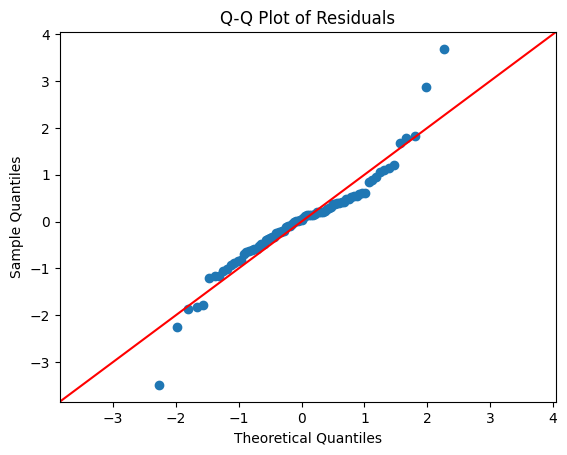

In [93]:
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

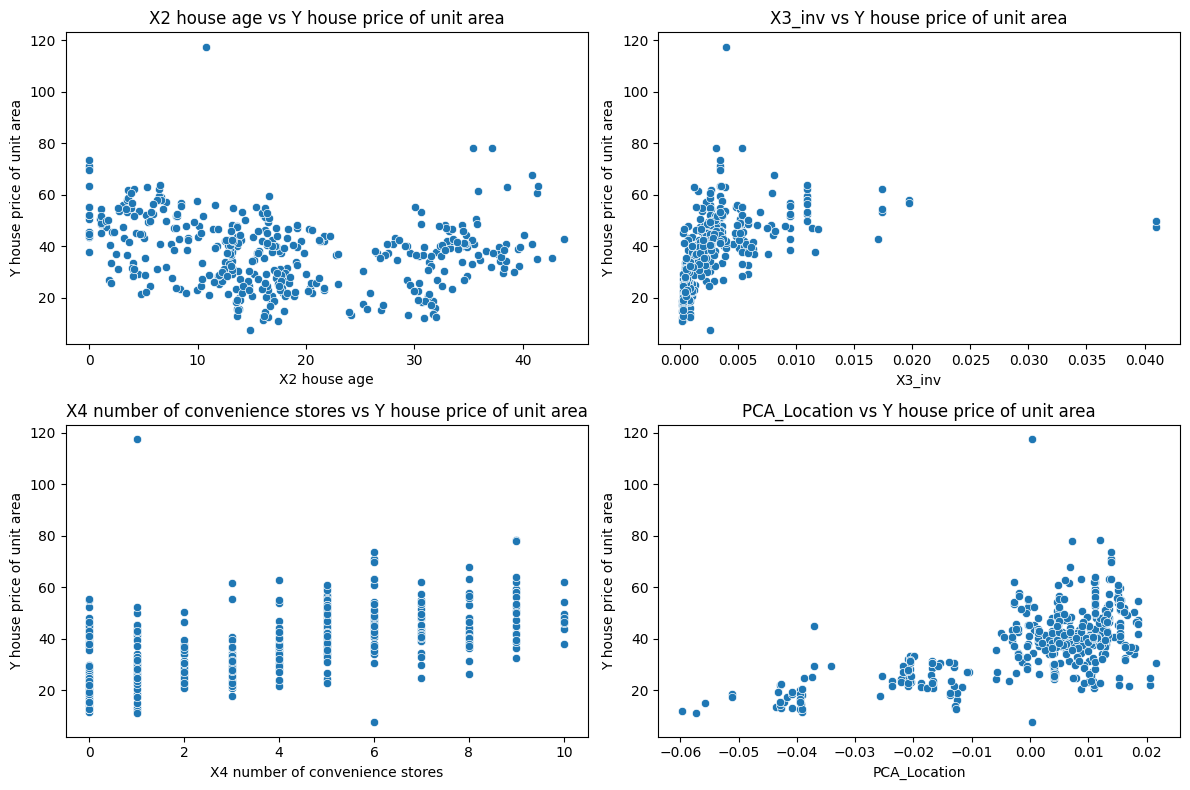

In [94]:
plt.figure(figsize=(12,8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_vif[feature], y=df_vif[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

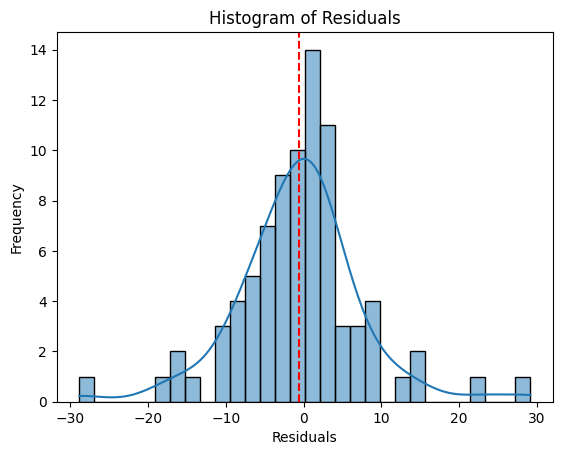

In [95]:
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(residuals.mean(), color='red', linestyle='dashed')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [98]:
df_vif['log_price'] = np.log(df_vif['Y house price of unit area'])

# Use log_price instead of raw price
y_log = df_vif['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Re-run regression with log-transformed target
model_log = LinearRegression()
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)
r2_log = r2_score(y_test, y_pred_log)
rmse_log = mean_squared_error(y_test, y_pred_log)**0.5

print(f"Log-Transformed Model - R²: {r2_log:.4f}, RMSE: {rmse_log:.4f}")

Log-Transformed Model - R²: 0.6933, RMSE: 0.2249


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)**0.5

print(f"\n🌲 Random Forest Regression Performance:")
print(f"R² Score: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")



🌲 Random Forest Regression Performance:
R² Score: 0.7937, RMSE: 5.8828


<ipython-input-108-c234f35b1bd9>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([r2], [0], 'ro', label='Linear Model', color='red')  # Plotting a single point
<ipython-input-108-c234f35b1bd9>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([r2_rf], [1], 'bo', label='Random Forest', color='blue')  # Plotting a single point
<ipython-input-108-c234f35b1bd9>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot([r2_log], [2], 'go', label='Log-Transformed Model', color='green') # Plotting a single point


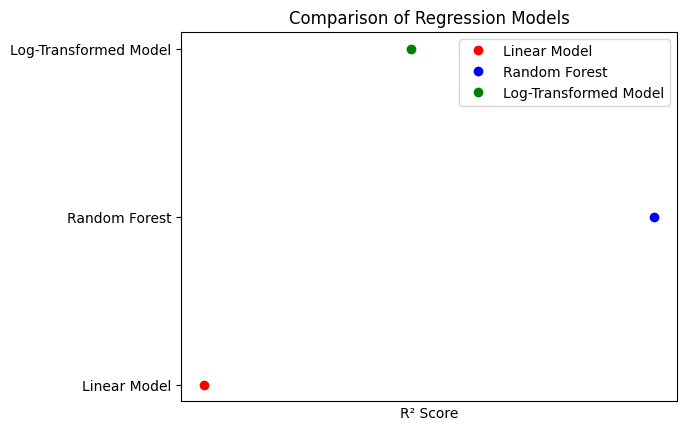

In [108]:
plt.plot([r2], [0], 'ro', label='Linear Model', color='red')  # Plotting a single point
plt.plot([r2_rf], [1], 'bo', label='Random Forest', color='blue')  # Plotting a single point
plt.plot([r2_log], [2], 'go', label='Log-Transformed Model', color='green') # Plotting a single point

plt.xticks([])  # Removing x-axis ticks
plt.yticks(np.arange(3), ['Linear Model', 'Random Forest', 'Log-Transformed Model'])  # Setting y-axis ticks
plt.xlabel('R² Score')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()